<a href="https://colab.research.google.com/github/nehaadnan/Electricity-Price-Analysis/blob/main/Analysis_of_Electrcity_Prices_in_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction
As global electricity demand continues to rise, understanding the intricacies of the energy market has become essential for investors, stakeholders, and businesses looking to expand their operations. For instance, a Canadian company seeking to enter the U.S. electricity market must navigate various complexities, including pricing dynamics, regional demand fluctuations, and customer segmentation. In such cases, market analysis is necessary for identifying opportunities and understanding the risks associated with expansion. Without a comprehensive understanding of how electricity prices, sales, and revenue vary across regions and time, businesses risk making uninformed decisions that could undermine their growth prospects and profitability.

To address this knowledge gap, this analysis aims to provide a detailed overview of electricity metrics that are crucial for effective business planning. By leveraging data-driven insights, companies can better navigate the complexities of energy markets and make informed decisions.

The analysis will examine how sales, revenue, the number of customers, and prices vary over both time and geographic space, as well as across different sectors. Additionally, it will identify which sectors contribute the highest percentage of total sales and determine when revenue, prices, and sales peak seasonally.

The US Electricity Sales dataset from Kaggle will be used for this analysis. This dataset includes valuable information on sales, revenue, prices, year, month, number of customers, sector, and region. The analysis will focus on cleaning and wrangling the data, creating visualizations to answer key questions, and exporting the modified CSV file to develop a Power BI dashboard. This dashboard will provide an interactive summary of key metrics, making it easy to communicate results effectively and support strategic decision-making.


##Data Cleaning

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving Electricty_Sales.csv to Electricty_Sales.csv


First, let's read the data into a dataframe and explore its properties, such as its size, datatypes, any missing values.

In [ ]:
import pandas as pd
df = pd.read_csv("Electricty_Sales.csv")
print(df.info()) # this provides us basic information on the data-types and if there are any missing values
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85870 entries, 0 to 85869
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              85870 non-null  int64  
 1   month             85870 non-null  int64  
 2   stateDescription  85870 non-null  object 
 3   sectorName        85870 non-null  object 
 4   customers         59830 non-null  float64
 5   price             85870 non-null  float64
 6   revenue           85870 non-null  float64
 7   sales             85870 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 5.2+ MB
None


,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,Wyoming,all sectors,NaN,4.31,48.12840,1116.17208
1,2001,1,Wyoming,commercial,NaN,5.13,12.67978,247.08691
2,2001,1,Wyoming,industrial,NaN,3.26,19.60858,602.30484
3,2001,1,Wyoming,other,NaN,4.75,0.76868,16.17442
4,2001,1,Wyoming,residential,NaN,6.01,15.07136,250.60591


The analysis indicates that the dataset contains 85,870 entries. All columns, except for the customer column, are complete. Next, let's explore the trends that may explain the missing customer data.

In [ ]:
# filter the dataframe to find an overview of missing data
customers_missing = df[df["customers"].isna()]
print(customers_missing)


       year  month stateDescription      sectorName  customers  price  \
0      2001      1          Wyoming     all sectors        NaN   4.31   
1      2001      1          Wyoming      commercial        NaN   5.13   
2      2001      1          Wyoming      industrial        NaN   3.26   
3      2001      1          Wyoming           other        NaN   4.75   
4      2001      1          Wyoming     residential        NaN   6.01   
...     ...    ...              ...             ...        ...    ...   
26035  2007     12          Indiana      commercial        NaN   7.49   
26036  2007     12          Indiana      industrial        NaN   4.67   
26037  2007     12          Indiana     residential        NaN   7.89   
26038  2007     12          Indiana  transportation        NaN  10.07   
26039  2007     12             Iowa     all sectors        NaN   6.42   

         revenue       sales  
0       48.12840  1116.17208  
1       12.67978   247.08691  
2       19.60858   602.30484  

The results show that customer data is missing from the beginning of 2001 to the end of 2007. This suggests that customer data was not recorded until 2008. Next, we can confirm whether every entry between these years has missing customer data.

In [ ]:
filter = df[(df["year"] <= 2001) & (df["year"] >= 2007) & (df["customers"].notnull())]
print(len(filter))

0


The code above confirms that every entry between 2001 and 2007 lacks customer information. Since this analysis focuses on understanding current trends and making predictions for energy companies, the data from 2001 to 2007 does not provide meaningful insights. Therefore, the missing values will be addressed by removing this portion of the dataset.

In [ ]:
df.dropna(subset = ["customers"], inplace = True)
df

,year,month,stateDescription,sectorName,customers,price,revenue,sales
26040,2008,1,Washington,all sectors,3145488.0,6.64,574.73235,8658.35972
26041,2008,1,Rhode Island,transportation,0.0,0.00,0.00000,0.00000
26042,2008,1,South Carolina,transportation,0.0,0.00,0.00000,0.00000
26043,2008,1,Massachusetts,industrial,14142.0,13.18,100.40468,761.89017
26044,2008,1,Massachusetts,residential,2611383.0,16.81,315.43624,1876.02831
...,...,...,...,...,...,...,...,...
85865,2024,1,Arkansas,all sectors,1717720.0,9.63,442.98773,4598.63147
85866,2024,1,Arkansas,commercial,208669.0,10.26,97.79467,953.02154
85867,2024,1,Arkansas,industrial,34951.0,7.08,109.92656,1553.02838
85868,2024,1,Arkansas,residential,1474098.0,11.24,235.26399,2092.56172


Additionally, there is an entry in the sectorName column labeled "All Sectors." Upon further examination, this entry represents aggregated totals of customers, revenue, and sales from other records within the dataset. While this aggregated data can be useful for broader analyses, it introduces redundancy for our specific purposes. For instance, including the "All Sectors" entry when analyzing total revenue for Arkansas would result in double counting, as the information is already present in the individual sector records.

To maintain accuracy in the analysis and prevent misleading results, rows labeled as "All Sectors" will be removed. This will ensure that the dataset accurately reflects the performance of individual sectors without distortion from aggregate totals.

A copy of the original dataframe will be retained to allow for further analysis if needed.

In [ ]:
df_2 = df.copy()
df = df[df["sectorName"] != "all sectors"]
df

,year,month,stateDescription,sectorName,customers,price,revenue,sales
26041,2008,1,Rhode Island,transportation,0.0,0.00,0.00000,0.00000
26042,2008,1,South Carolina,transportation,0.0,0.00,0.00000,0.00000
26043,2008,1,Massachusetts,industrial,14142.0,13.18,100.40468,761.89017
26044,2008,1,Massachusetts,residential,2611383.0,16.81,315.43624,1876.02831
26045,2008,1,Massachusetts,transportation,1.0,8.33,2.65360,31.84507
...,...,...,...,...,...,...,...,...
85864,2024,1,Arizona,transportation,2.0,9.95,0.07753,0.77947
85866,2024,1,Arkansas,commercial,208669.0,10.26,97.79467,953.02154
85867,2024,1,Arkansas,industrial,34951.0,7.08,109.92656,1553.02838
85868,2024,1,Arkansas,residential,1474098.0,11.24,235.26399,2092.56172


Continuing with the analysis, a new column will be created to represent Revenue Generated per Customer. This metric is calculated by dividing the total revenue by the number of customers for each entry. By computing this metric, deeper insights into operational efficiency can be gained, supporting informed decision-making. This analysis will identify the areas and sectors that generate the highest revenue per customer, highlighting opportunities for improvement and optimization.

In [ ]:
df["revenue_per_customer"] = (df["revenue"]*1000000)/df['customers']
df.head()

<ipython-input-8-9ab97e461212>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["revenue_per_customer"] = (df["revenue"]*1000000)/df['customers']


,year,month,stateDescription,sectorName,customers,price,revenue,sales,revenue_per_customer
26041,2008,1,Rhode Island,transportation,0.0,0.00,0.00000,0.00000,NaN
26042,2008,1,South Carolina,transportation,0.0,0.00,0.00000,0.00000,NaN
26043,2008,1,Massachusetts,industrial,14142.0,13.18,100.40468,761.89017,7.099751e+03
26044,2008,1,Massachusetts,residential,2611383.0,16.81,315.43624,1876.02831,1.207928e+02
26045,2008,1,Massachusetts,transportation,1.0,8.33,2.65360,31.84507,2.653600e+06


Some of the revenue_per_customer enteries are NaN, let's investigate this further.

In [ ]:
df[df["revenue_per_customer"].isna()]

,year,month,stateDescription,sectorName,customers,price,revenue,sales,revenue_per_customer
26041,2008,1,Rhode Island,transportation,0.0,0.0,0.0,0.0,NaN
26042,2008,1,South Carolina,transportation,0.0,0.0,0.0,0.0,NaN
26060,2008,1,Mississippi,transportation,0.0,0.0,0.0,0.0,NaN
26065,2008,1,Nebraska,transportation,0.0,0.0,0.0,0.0,NaN
26070,2008,1,Kansas,transportation,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
85817,2024,1,Iowa,transportation,0.0,0.0,0.0,0.0,NaN
85822,2024,1,Kansas,transportation,0.0,0.0,0.0,0.0,NaN
85827,2024,1,Kentucky,transportation,0.0,0.0,0.0,0.0,NaN
85854,2024,1,Alabama,transportation,0.0,0.0,0.0,0.0,NaN


This appears to be due to both revenue and customers being 0s, lets fill in NA values with 0.

In [ ]:
df['revenue_per_customer'] = df['revenue_per_customer'].fillna(0)


<ipython-input-10-07d08a7a5925>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revenue_per_customer'] = df['revenue_per_customer'].fillna(0)


We are also interested in exploring how seasonality impacts electricty prices, therefore the month is used to map to season to use for analysis.

In [ ]:
season_map = { 12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'}
df["Season"] = df["month"].map(season_map)


<ipython-input-11-3810eadc7ae1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Season"] = df["month"].map(season_map)


## Visualizations, Answering Research Questions

Now that basic data cleaning and wrangling are complete, the next step is to proceed with the analysis. The main research questions are as follows:

What are the trends in electricity sales and revenue over time?
How do electricity prices and revenue vary by state and sector?
How does seasonality impact electricity prices and revenue?
Which sectors contribute the most to overall electricity sales?
What is the distribution of customers across different states?

To answer these, visualizations of different metrics will be created below


**Trends in Electricty Sales, Revenue, Price and Customers over Time**

In [ ]:
import matplotlib.pyplot as plt
def plot_avg_by_year(col):
  # Set the unit based on the column
    if col == "sales":
        unit = "million kWh"
    elif col == "revenue":
        unit = "millions of dollars"
    elif col == "price":
        unit = "cents per kWh"
    else:
      unit = "number of people"

    # Group the DataFrame by year and calculate the mean
    df_grouped = df.groupby('year')[col].mean().reset_index()

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(df_grouped['year'], df_grouped[col], marker='o', linestyle='-', color='b')
    plt.title(f'Average Electricity {col} By Year (2008-2024)')
    plt.xlabel('Year')
    plt.ylabel(f'Electricity {col} ({unit})')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



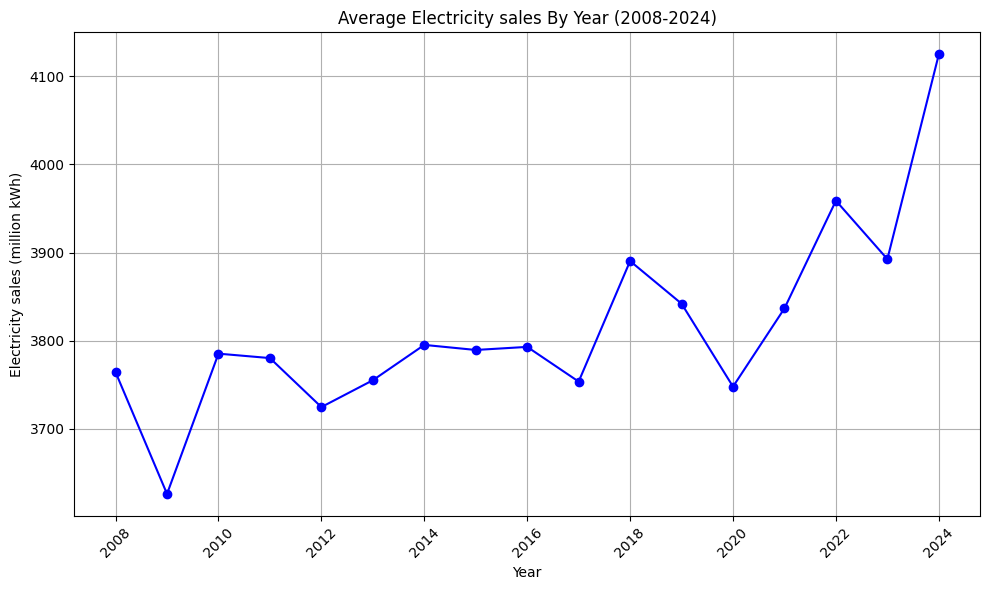

In [ ]:
plot_avg_by_year("sales")


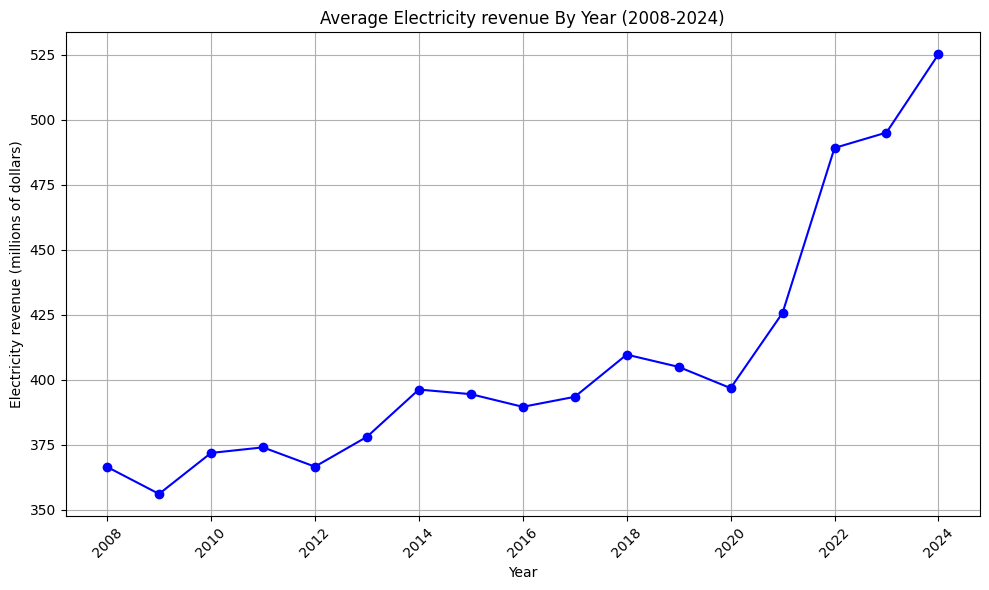

In [ ]:
plot_avg_by_year("revenue")


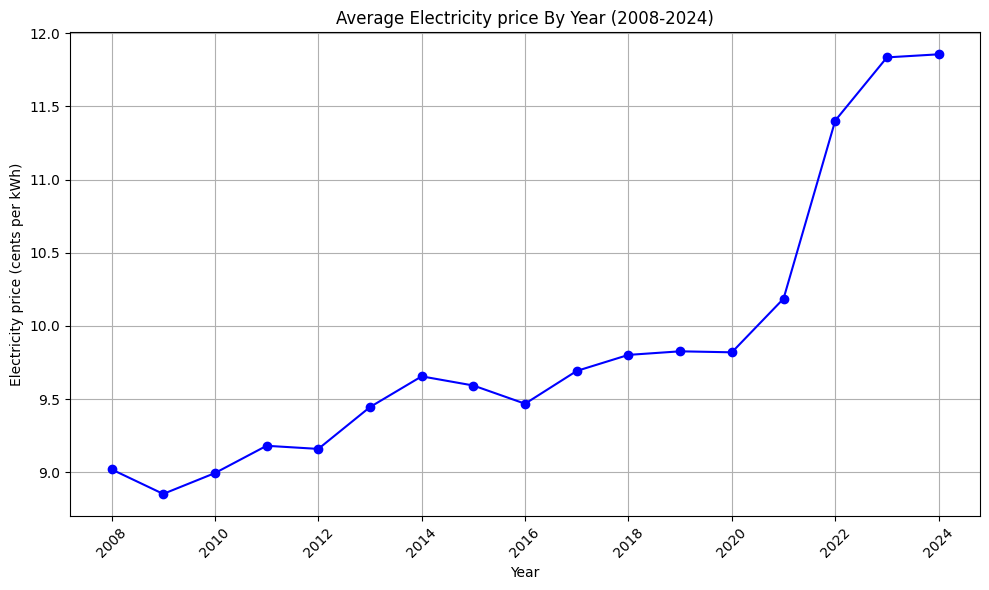

In [ ]:
plot_avg_by_year("price")

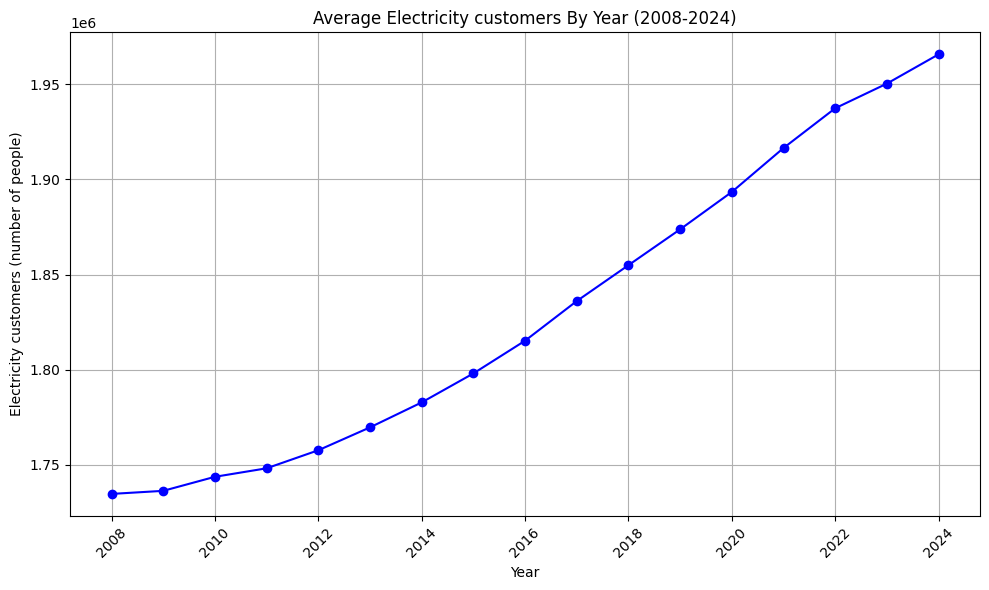

In [ ]:
plot_avg_by_year("customers")


From the figures above, it is evident that the electricity market has experienced growth from the years of 2008 to 2024. From the graphs of revenue, customers, and price, we can see that all three metrics have been steadily increasing over the years. This indicates that the demand for electricity has risen, perhaps reflecting a growing population. However, the graph for sales does not display as clear of a trend; although there is overall growth from 2008 to 2024, there are some dips seen in the graph. For instance, 2020 shows a period of lower sales, possibly due to the pandemic, when many businesses and industries temporarily closed or reduced their operations. These insights reveal that while the overall market is expanding, external factors like economic downturns or global events can impact sales performance.

**How does the price,revenue, and number of customers of electricity vary by state and sector?**

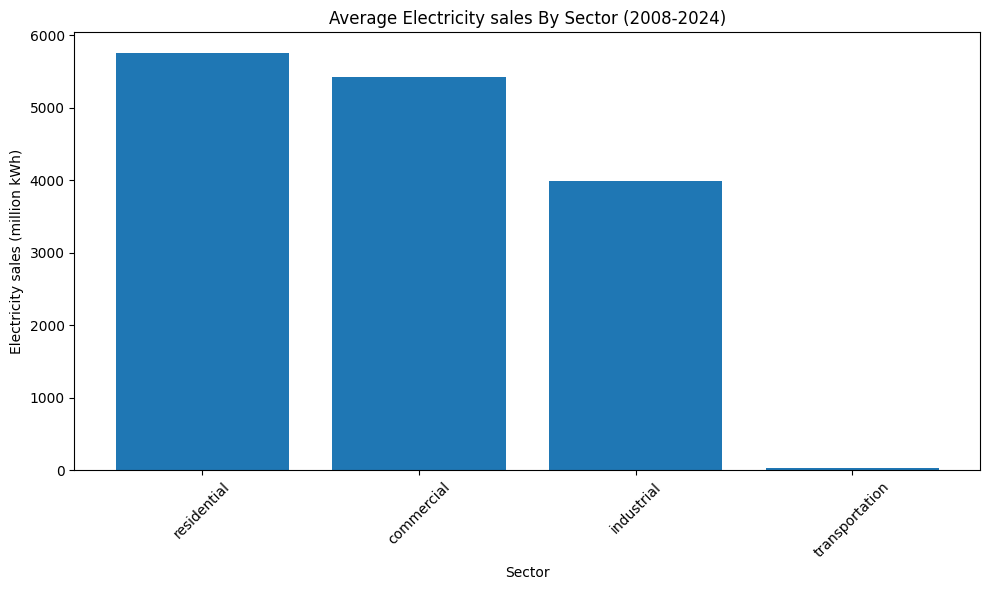

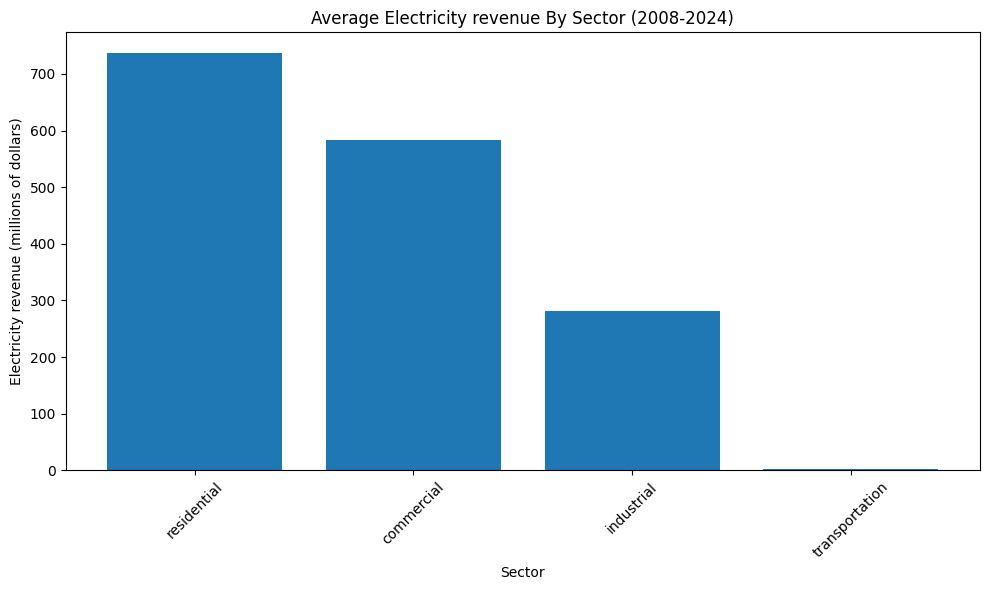

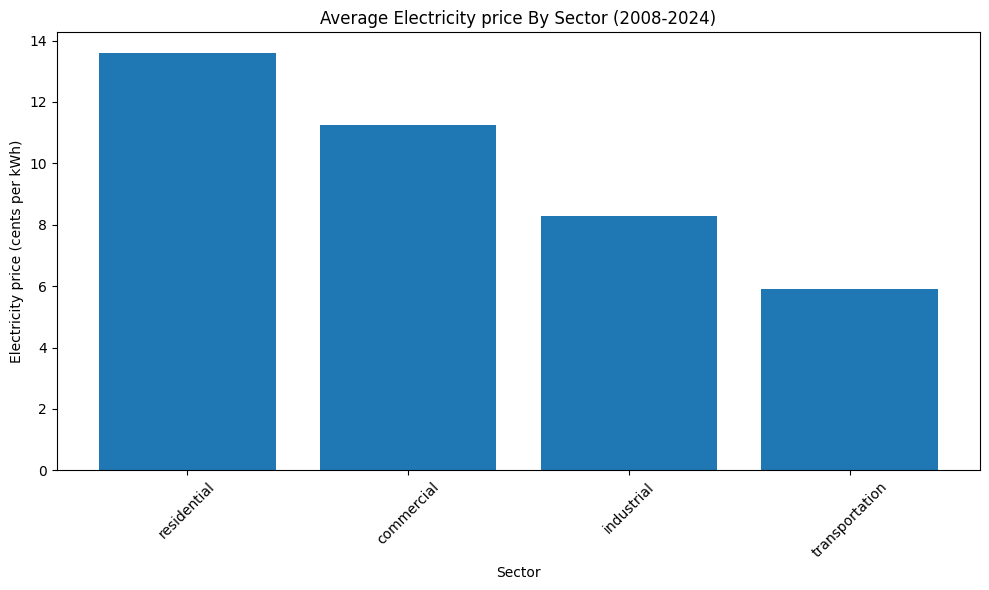

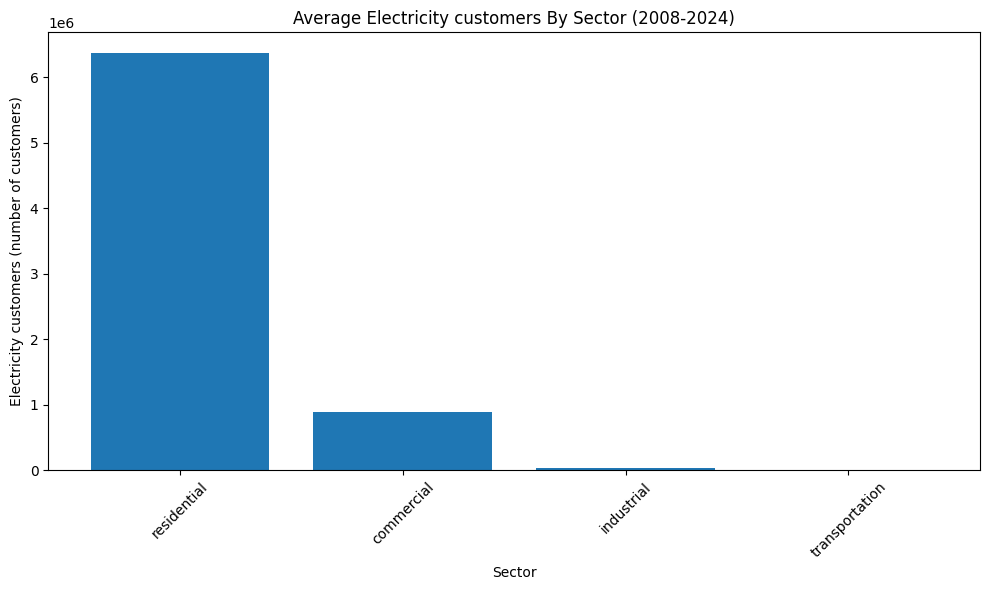

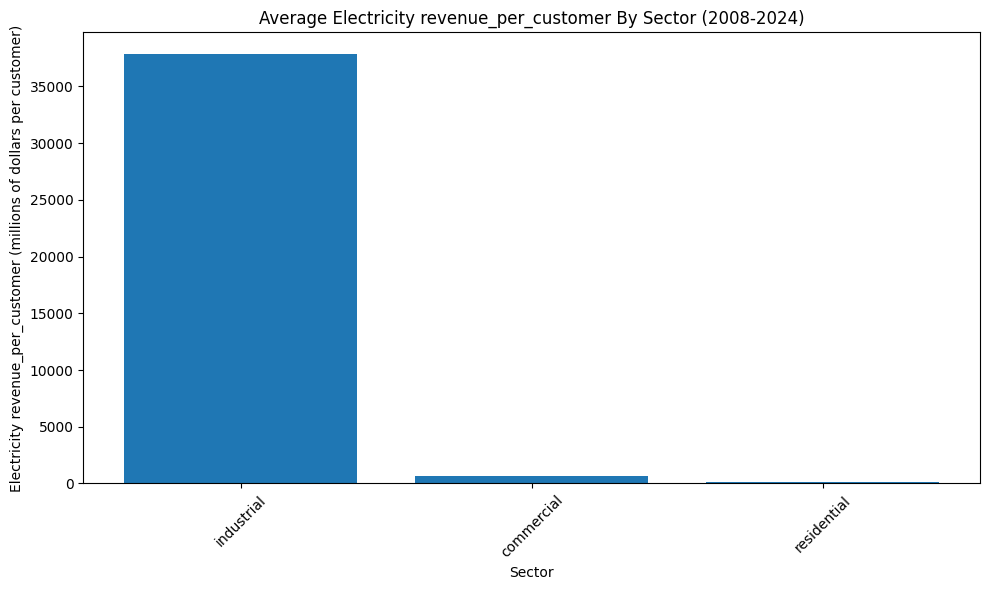

In [ ]:
def plot_avg_by_group(col, group):
  units = {"sales": "million kWh",
        "revenue": "millions of dollars",
        "price": "cents per kWh",
        "customers": "number of customers",
        "revenue_per_customer": "millions of dollars per customer"}

  groups = {"stateDescription": "Region",
        "sectorName": "Sector"}

  unit = units.get(col, "number of customers")
  group_name = groups.get(group, group)
  # Group the DataFrame by year and calculate the mean
  df_grouped = df.groupby(group)[col].mean().reset_index()
  df_top_10 = df_grouped.nlargest(10, col).sort_values(by=col, ascending=False)

  # Create the plot
  plt.figure(figsize=(10, 6))
  plt.bar(df_top_10 [group], df_top_10 [col])
  plt.title(f'Average Electricity {col} By {group_name} (2008-2024)')
  plt.xlabel(group_name)
  plt.ylabel(f'Electricity {col} ({unit})')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()


plot_avg_by_group("sales", "sectorName")
plot_avg_by_group("revenue", "sectorName")
plot_avg_by_group("price", "sectorName")
plot_avg_by_group("customers", "sectorName")
plot_avg_by_group("revenue_per_customer", "sectorName")


The graphs above indicate that the residential sector leads in customer count, revenue, average price, and sales, followed by the commercial, industrial, and transportation sectors. These findings highlight that the residential sector is the largest and most profitable, reflecting strong market demand and a significant contribution to overall revenue. The robust performance across all metrics,customer count, revenue, average price, and sales—suggests a consistent demand for electricity in this sector. This stability provides a solid foundation for potential expansion or further investment.

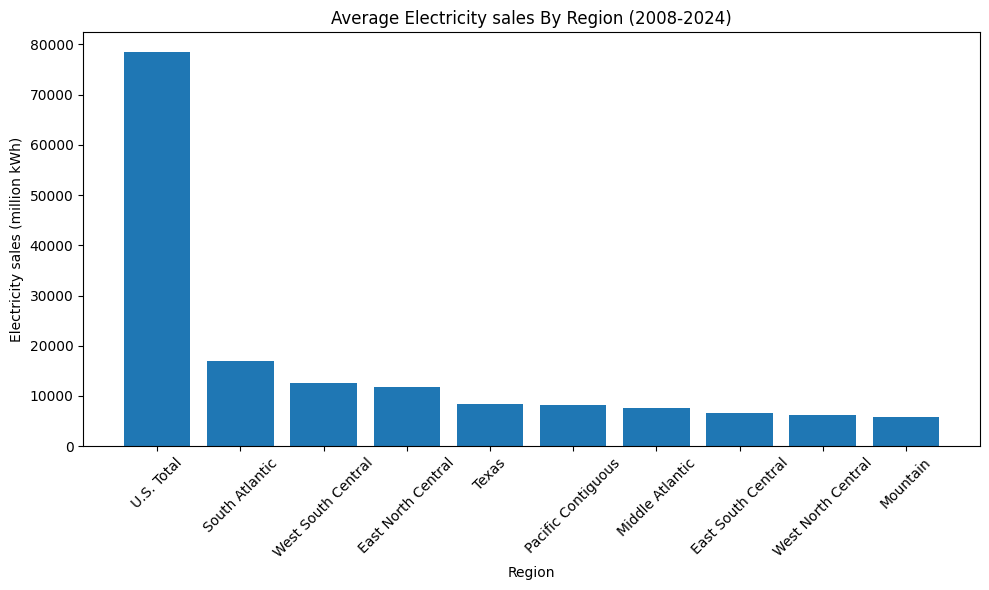

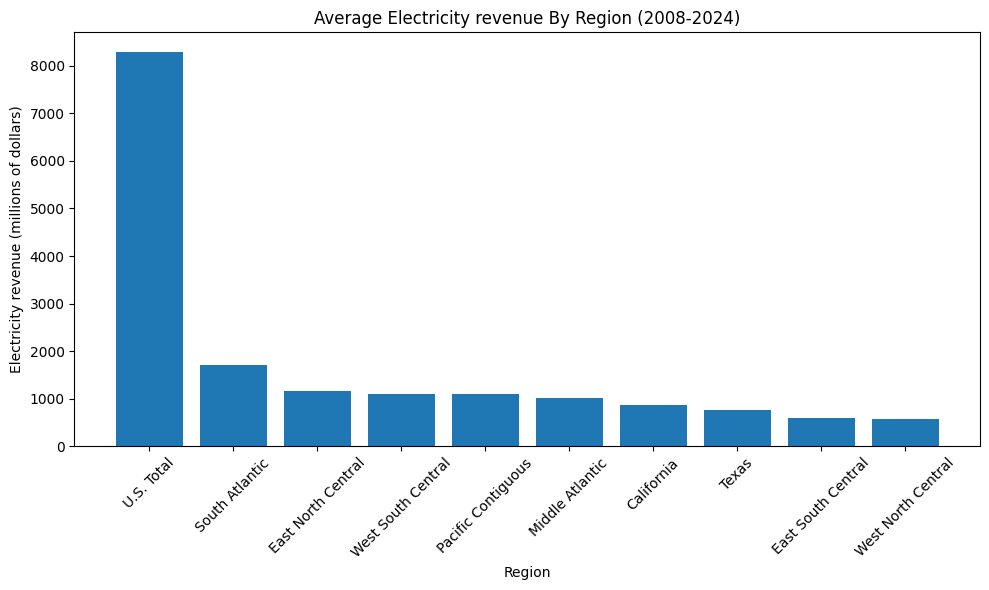

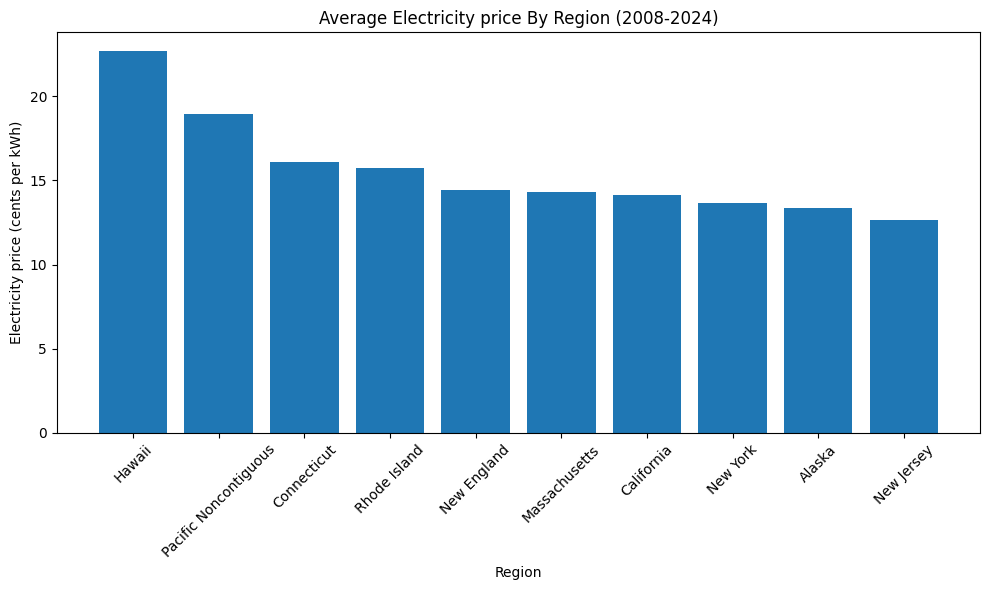

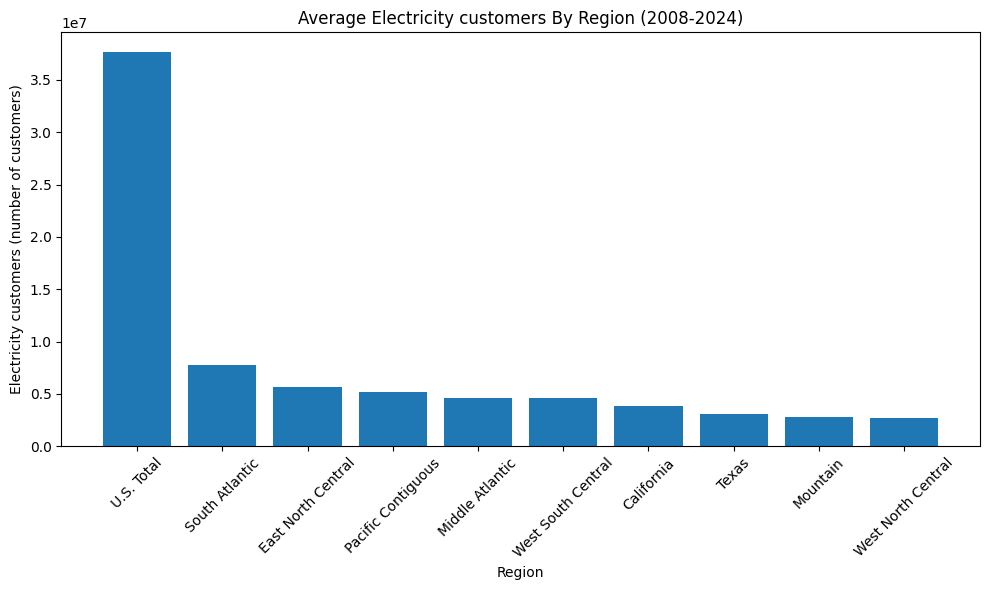

In [ ]:
plot_avg_by_group("sales", "stateDescription")
plot_avg_by_group("revenue", "stateDescription")
plot_avg_by_group("price", "stateDescription")
plot_avg_by_group("customers", "stateDescription")

The figures above show that after the U.S. total, the South Atlantic region has the highest revenue, customer count, and sales. However, Hawaii stands out as the region with the highest average price. The top 10 regions for revenue, price, customer count, and sales are detailed above.

These insights offer valuable opportunities for businesses. The South Atlantic region's strong performance indicates a robust market that companies can tap into for growth. Businesses can tailor their marketing strategies and operational plans to target this area, potentially increasing their market share.



**How does seasonality impact the price,revenue and sales of electricty?**



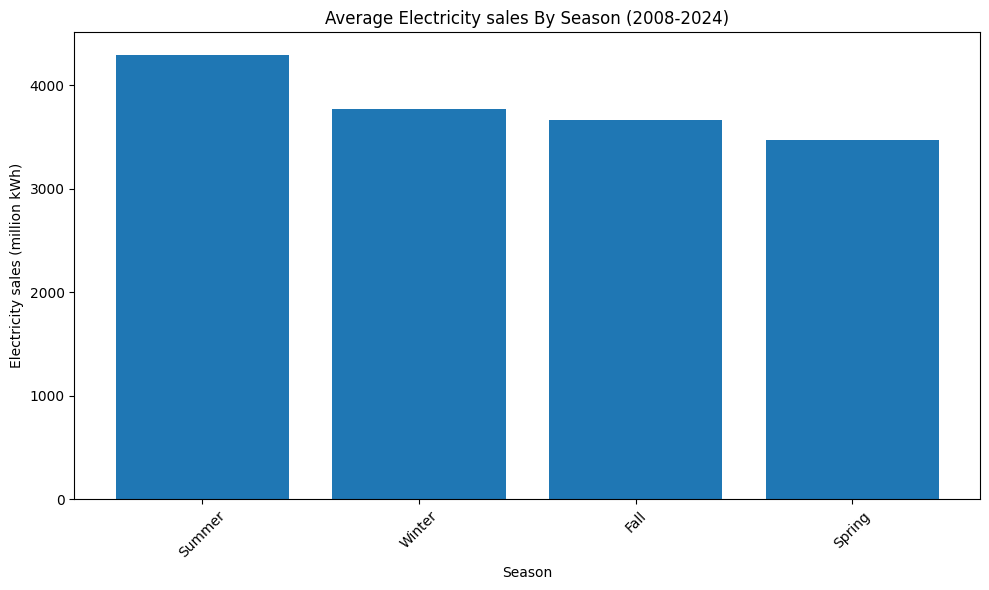

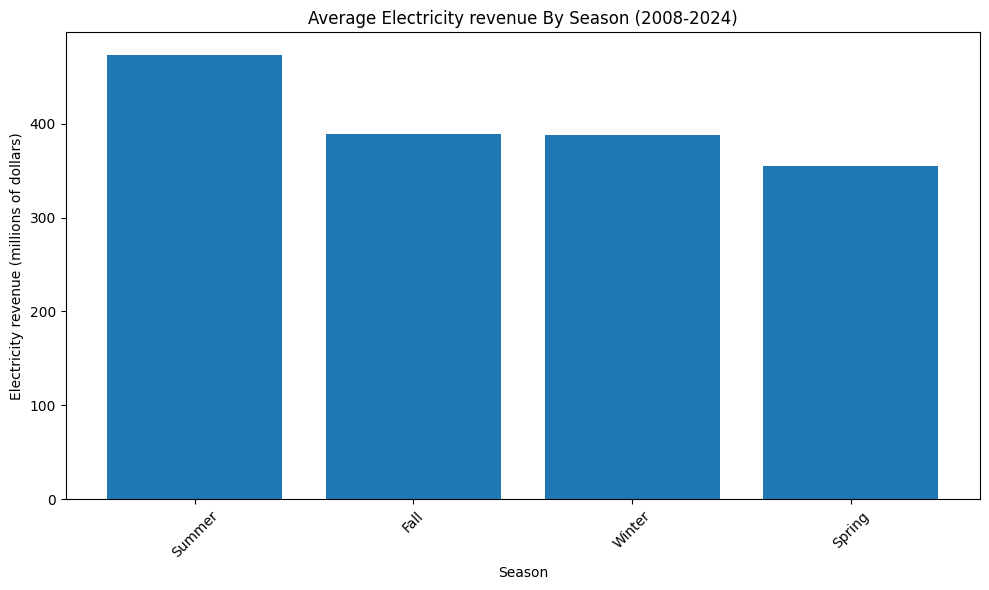

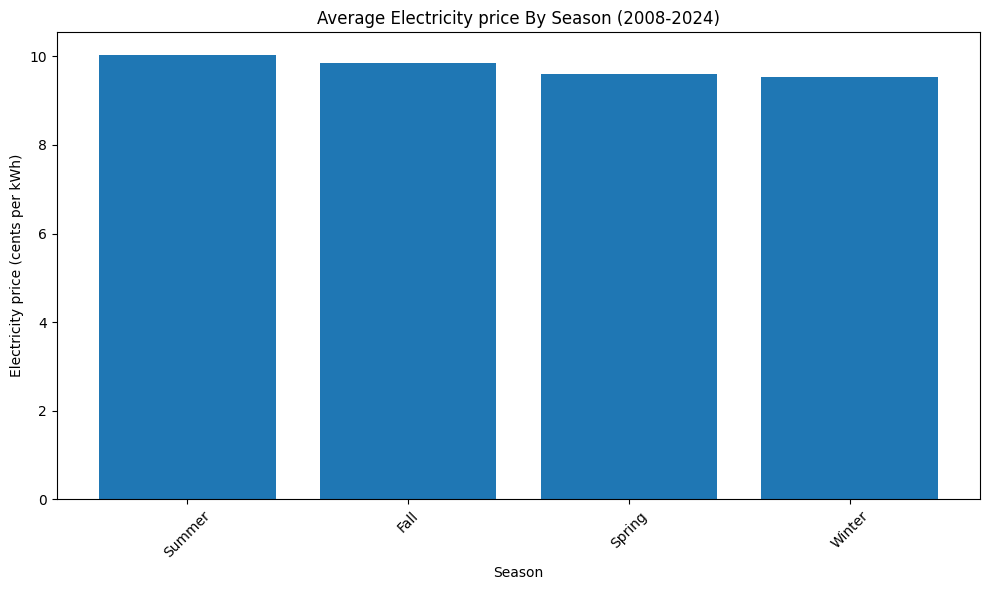

In [ ]:
plot_avg_by_group("sales", "Season")
plot_avg_by_group("revenue", "Season")
plot_avg_by_group("price", "Season")

The highest revenue, sales, and prices occur during the summer months, indicating a strong seasonal effect on electricity consumption. Increased use of air conditioning and cooling systems during this time likely drives the surge in demand as consumers seek relief from high temperatures.

These patterns underscore the considerable impact that seasonal fluctuations have on electricity consumption and revenue generation. Recognizing summer as the peak season for electricity sales can help utility companies develop strategies for resource allocation, grid management, and pricing.

For investors, understanding these seasonal trends is crucial for making informed decisions. Anticipating demand spikes can guide investment strategies and risk assessments, allowing investors to identify opportunities in utilities that are well-positioned to capitalize on increased consumption during peak seasons.

**Which sectors contribute the most to overall electricity sales?**

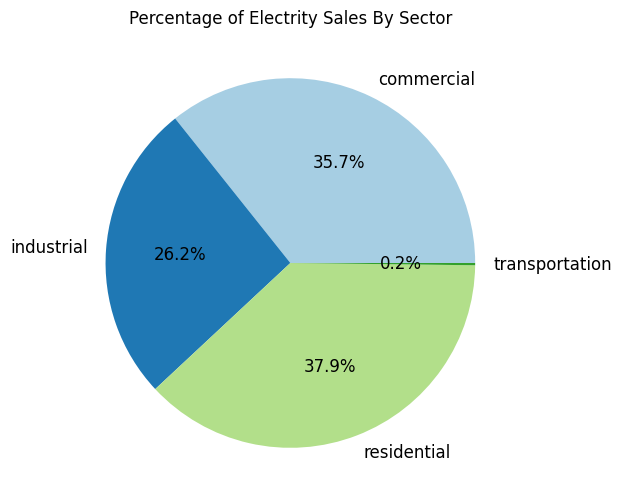

In [ ]:
df_sector = df.groupby("sectorName")["sales"].mean().reset_index()
plt.figure(figsize=(6, 6))
colors = plt.cm.Paired(range(len(df_sector)))
sizes = df_sector["sales"]
plt.pie(sizes, labels=df_sector["sectorName"], autopct='%1.1f%%', textprops={'fontsize': 12}, colors=colors)
plt.title('Percentage of Electrity Sales By Sector')
plt.show()

The residenital sector contributes the most to sales, followed by the commerical, indsutrial and lastly transportation sector. The dominance of the residential sector in electricity sales highlights its significance for electricty companies, indicating a need for targeted marketing strategies and tailored products to meet this demographic's demands.

##Modify Metrics to Export to Excel

In [ ]:
df_to_export = df.copy()
df_to_export["sales"] = df_to_export["sales"].apply(lambda x: 1000000 * x)
df_to_export["revenue"] = df_to_export["revenue"].apply(lambda x: 1000000 * x)

In [ ]:
from google.colab import files

df_to_export.to_csv('electricity_data.csv', index=False)
files.download('electricity_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>